In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv('body_level_classification_train.csv', index_col=False)

In [3]:
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [4]:
#Data shows there are no outliers
df.describe()


,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,24.290420,1.701602,86.542290,2.421912,2.005120,2.682104,1.023106,0.650672
std,6.323081,0.094654,26.278277,0.540711,0.620307,0.790751,0.844840,0.605199
min,15.000000,1.456346,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.895877,1.629194,65.000000,2.000000,1.549931,2.644692,0.145687,0.000000
50%,22.720449,1.701284,82.636162,2.416044,2.000000,3.000000,1.000000,0.616045
75%,26.000000,1.770278,106.690530,3.000000,2.482933,3.000000,1.672639,1.000000
max,55.246250,1.980000,173.000000,3.000000,3.000000,4.000000,3.000000,2.000000


In [5]:
#No Empty Data
df.isna().sum()

Gender                0
Age                   0
Height                0
Weight                0
H_Cal_Consump         0
Veg_Consump           0
Water_Consump         0
Alcohol_Consump       0
Smoking               0
Meal_Count            0
Food_Between_Meals    0
Fam_Hist              0
H_Cal_Burn            0
Phys_Act              0
Time_E_Dev            0
Transport             0
Body_Level            0
dtype: int64

In [6]:
df.nunique()

Gender                   2
Age                    993
Height                1113
Weight                1081
H_Cal_Consump            2
Veg_Consump            578
Water_Consump          894
Alcohol_Consump          4
Smoking                  2
Meal_Count             460
Food_Between_Meals       4
Fam_Hist                 2
H_Cal_Burn               2
Phys_Act               846
Time_E_Dev             785
Transport                5
Body_Level               4
dtype: int64

In [7]:
#Map categorical features to 1 and 0
genderMapping = {"Male": 1, "Female": 0}
YesNoMapping = {"yes": 1, "no": 0} #For cal consump, smoking, fam hist, cal burn

df["Gender"] = df["Gender"].map(genderMapping)
df["H_Cal_Consump"] = df["H_Cal_Consump"].map(YesNoMapping)
df["Smoking"] = df["Smoking"].map(YesNoMapping)
df["Fam_Hist"] = df["Fam_Hist"].map(YesNoMapping)
df["H_Cal_Burn"] = df["H_Cal_Burn"].map(YesNoMapping)

In [8]:
#One hot encoding of multiple categories 
categorial_columns = ['Alcohol_Consump', 'Food_Between_Meals','Transport']
df = pd.get_dummies(data=df, columns=categorial_columns)

In [9]:
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Smoking,Meal_Count,Fam_Hist,...,Alcohol_Consump_no,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,0,22.547298,1.722461,51.881263,1,2.663421,1.041110,0,3.000000,1,...,1,0,1,0,0,0,0,0,1,0
1,1,19.799054,1.743702,54.927529,1,2.000000,2.847264,0,3.289260,1,...,0,0,0,1,0,0,0,0,1,0
2,0,17.823438,1.708406,50.000000,1,1.642241,1.099231,0,3.452590,0,...,0,0,0,1,0,0,0,0,1,0
3,0,19.007177,1.690727,49.895716,1,1.212908,1.029703,0,3.207071,0,...,0,0,0,1,0,0,0,0,1,0
4,1,19.729250,1.793315,58.195150,1,2.508835,2.076933,0,3.435905,1,...,1,0,0,1,0,1,0,0,0,0


In [10]:
label_encoder = LabelEncoder()
df['Body_Level'] = label_encoder.fit_transform(df['Body_Level'])
label = df.pop('Body_Level')
df.insert(0, 'Body_Level', label)

In [11]:
df.head()

,Body_Level,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Smoking,Meal_Count,...,Alcohol_Consump_no,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,0,0,22.547298,1.722461,51.881263,1,2.663421,1.041110,0,3.000000,...,1,0,1,0,0,0,0,0,1,0
1,0,1,19.799054,1.743702,54.927529,1,2.000000,2.847264,0,3.289260,...,0,0,0,1,0,0,0,0,1,0
2,0,0,17.823438,1.708406,50.000000,1,1.642241,1.099231,0,3.452590,...,0,0,0,1,0,0,0,0,1,0
3,0,0,19.007177,1.690727,49.895716,1,1.212908,1.029703,0,3.207071,...,0,0,0,1,0,0,0,0,1,0
4,0,1,19.729250,1.793315,58.195150,1,2.508835,2.076933,0,3.435905,...,1,0,0,1,0,1,0,0,0,0


In [12]:
df.dtypes

Body_Level                           int32
Gender                               int64
Age                                float64
Height                             float64
Weight                             float64
H_Cal_Consump                        int64
Veg_Consump                        float64
Water_Consump                      float64
Smoking                              int64
Meal_Count                         float64
Fam_Hist                             int64
H_Cal_Burn                           int64
Phys_Act                           float64
Time_E_Dev                         float64
Alcohol_Consump_Always               uint8
Alcohol_Consump_Frequently           uint8
Alcohol_Consump_Sometimes            uint8
Alcohol_Consump_no                   uint8
Food_Between_Meals_Always            uint8
Food_Between_Meals_Frequently        uint8
Food_Between_Meals_Sometimes         uint8
Food_Between_Meals_no                uint8
Transport_Automobile                 uint8
Transport_B

In [13]:
#Label counts
df['Body_Level'].value_counts()

3    680
2    406
1    201
0    190
Name: Body_Level, dtype: int64

Calculating BMI from this data is very intuitive, where BMI is Weight/Height^2

In [14]:
df['BMI'] = df['Weight']/(df['Height'] * df['Height'])

Let's check How useful is BMI

In [15]:
def showScatter(columnName):
  plt.scatter([i for i in range(len(df))], df[columnName], c=df['Body_Level'])

  # Add a colorbar legend
  plt.colorbar()

  # Set x and y axis labels
  plt.xlabel('point')
  plt.ylabel(columnName)

  # Show the plot
  plt.show()

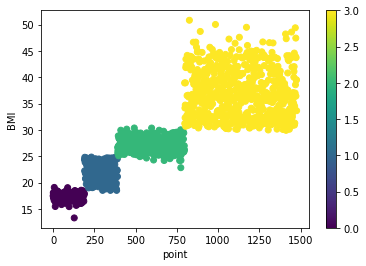

In [16]:
showScatter('BMI')

It's almost perfect, let's compare this with Weight and Height




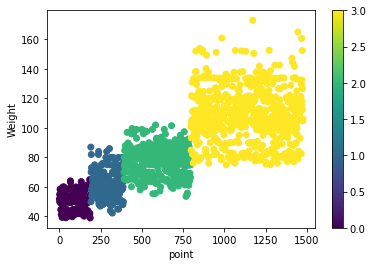

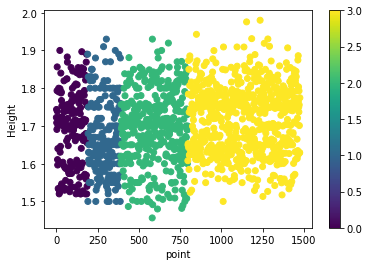

In [17]:
showScatter('Weight')
showScatter('Height')

Let's see all other columns

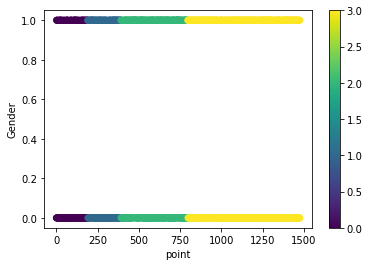

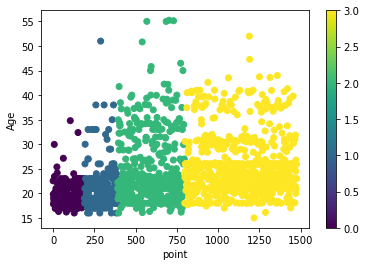

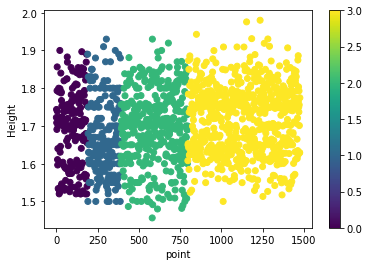

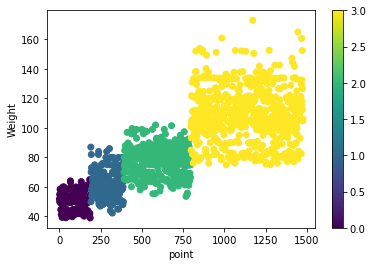

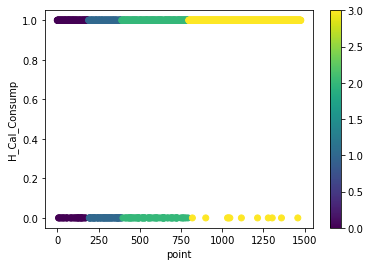

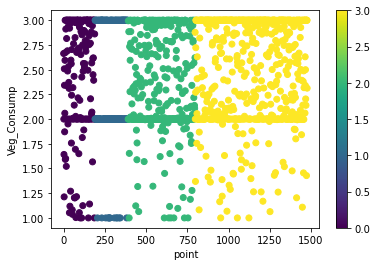

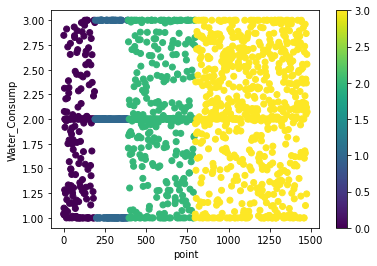

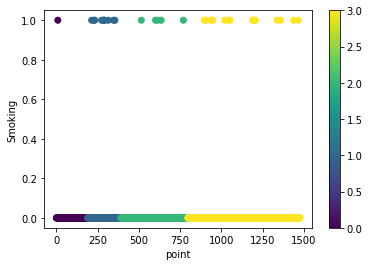

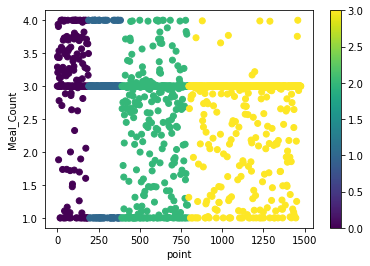

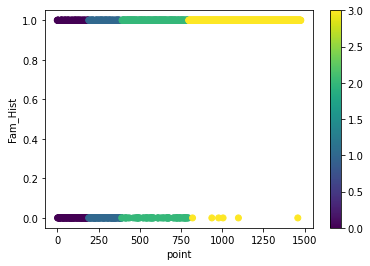

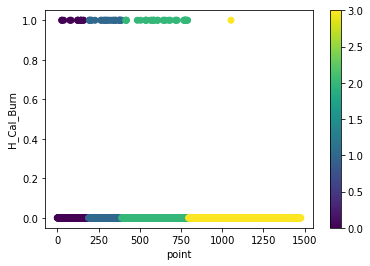

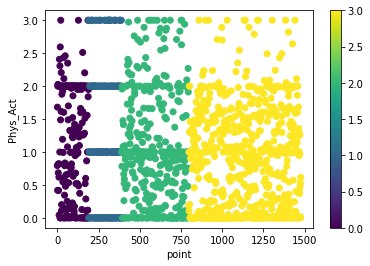

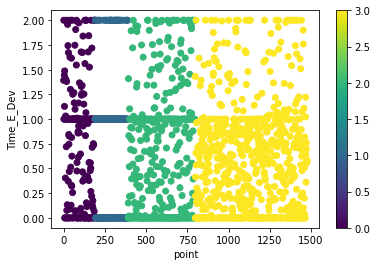

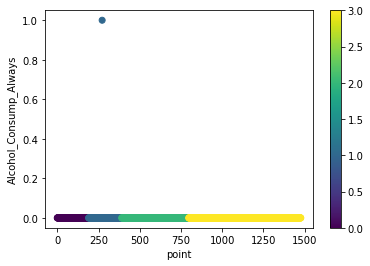

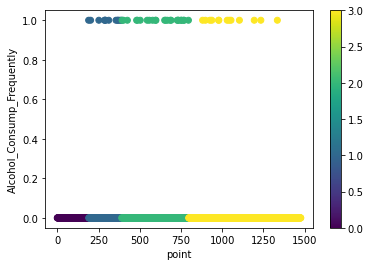

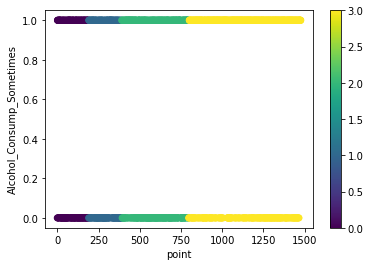

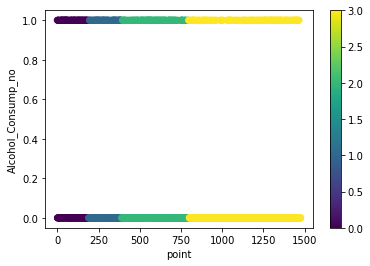

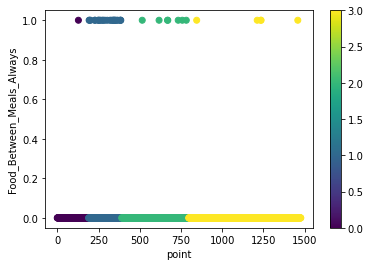

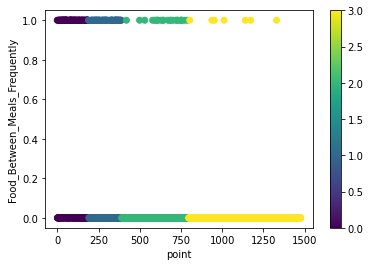

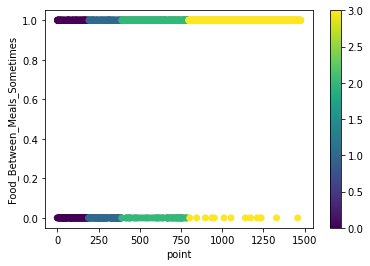

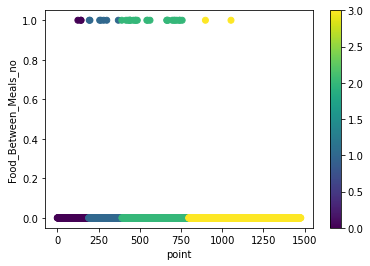

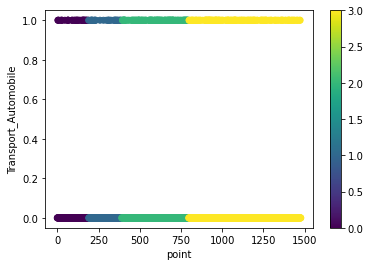

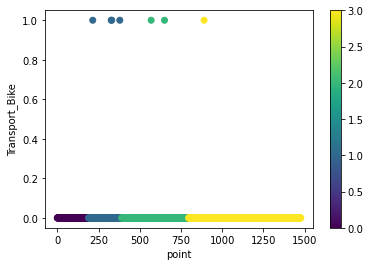

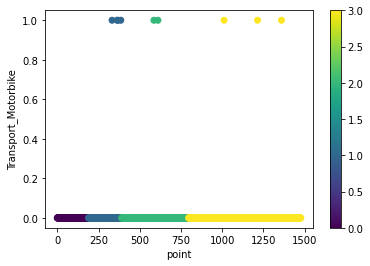

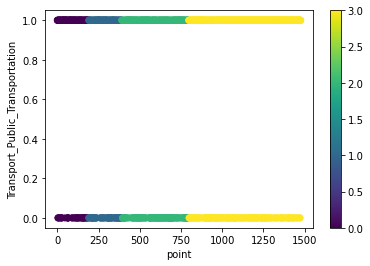

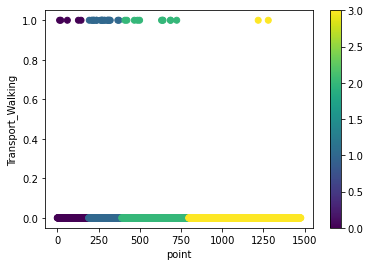

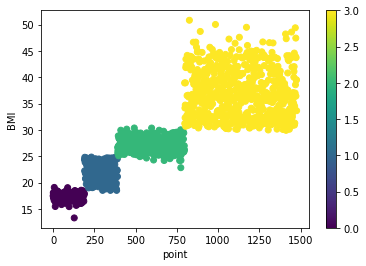

In [18]:
for columnName in df.columns[1:]:
  showScatter(columnName)

Normalize values

In [19]:
normalizeColumns = ['BMI', 'Age', 'Weight', 'Height', 'Veg_Consump', 'Water_Consump', 'Meal_Count', 'Phys_Act', 'Time_E_Dev']

scaler = StandardScaler()
df[normalizeColumns] = scaler.fit_transform(df[normalizeColumns])

In [20]:
df.describe()

,Body_Level,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Smoking,Meal_Count,...,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking,BMI
count,1477.000000,1477.000000,1.477000e+03,1.477000e+03,1.477000e+03,1477.000000,1.477000e+03,1.477000e+03,1477.000000,1.477000e+03,...,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1.477000e+03
mean,2.067028,0.505078,-1.731858e-16,1.414350e-15,-4.618287e-16,0.884225,-2.020501e-16,6.350145e-16,0.022343,4.329644e-17,...,0.025728,0.120515,0.830061,0.023697,0.218687,0.004739,0.006093,0.744753,0.025728,-1.539429e-16
std,1.052280,0.500144,1.000339e+00,1.000339e+00,1.000339e+00,0.320064,1.000339e+00,1.000339e+00,0.147845,1.000339e+00,...,0.158376,0.325673,0.375706,0.152154,0.413495,0.068703,0.077849,0.436148,0.158376,1.000339e+00
min,0.000000,0.000000,-1.469784e+00,-2.591965e+00,-1.809799e+00,0.000000,-2.630597e+00,-1.620907e+00,0.000000,-2.127945e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.047354e+00
25%,1.000000,0.000000,-6.952356e-01,-7.652394e-01,-8.200532e-01,1.000000,-7.805551e-01,-7.340607e-01,0.000000,-4.732770e-02,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.744224e-01
50%,2.000000,1.000000,-2.483762e-01,-3.363805e-03,-1.486951e-01,1.000000,-1.085627e-02,-8.257041e-03,0.000000,4.021545e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.202945e-01
75%,3.000000,1.000000,2.704629e-01,7.257921e-01,7.669858e-01,1.000000,1.069487e+00,7.705448e-01,0.000000,4.021545e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.921340e-01
max,3.000000,1.000000,4.897346e+00,2.942217e+00,3.291197e+00,1.000000,1.069487e+00,1.604393e+00,1.000000,1.667204e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.640135e+00


In [21]:
df = df.sample(frac=1)
df.reset_index(drop=True, inplace=True)

In [24]:
df.to_csv('dataset.csv', index=False)